In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature

In [3]:
files = '/home/averstyn/final_s5p/co/*.nc'
ds = xr.open_mfdataset(files)
ds

<xarray.Dataset>
Dimensions:                      (time: 295, lat: 361, lon: 3601)
Coordinates:
  * time                         (time) datetime64[ns] 2019-08-06 ... 2022-10-30
  * lat                          (lat) float64 -90.0 -89.5 -89.0 ... 89.5 90.0
  * lon                          (lon) float64 0.0 0.1 0.2 ... 359.8 359.9 360.0
Data variables:
    carbonmonoxide_total_column  (time, lat, lon) float32 dask.array<chunksize=(1, 361, 3601), meta=np.ndarray>

In [4]:
ds_2019 = ds.sel(time=slice('2019-01-01','2019-12-31'))
ds_2020 = ds.sel(time=slice('2020-01-01','2020-12-31'))
ds_2021 = ds.sel(time=slice('2021-01-01','2021-12-31'))
ds_2022 = ds.sel(time=slice('2022-01-01','2022-12-31'))

In [5]:
month_2019 = ds_2019.groupby('time.month').mean()
month_2020 = ds_2020.groupby('time.month').mean()
month_2021 = ds_2021.groupby('time.month').mean()
month_2022 = ds_2022.groupby('time.month').mean()
month_2019.sel(month=8)

<xarray.Dataset>
Dimensions:                      (lat: 361, lon: 3601)
Coordinates:
  * lat                          (lat) float64 -90.0 -89.5 -89.0 ... 89.5 90.0
  * lon                          (lon) float64 0.0 0.1 0.2 ... 359.8 359.9 360.0
    month                        int64 8
Data variables:
    carbonmonoxide_total_column  (lat, lon) float32 dask.array<chunksize=(361, 3601), meta=np.ndarray>

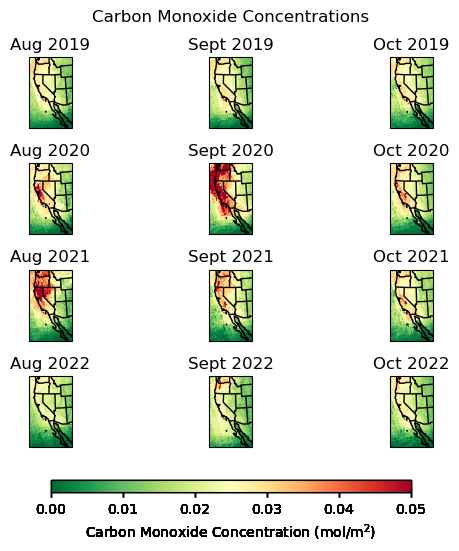

In [7]:
months = ['Aug 2019', 'Sept 2019', 'Oct 2019', 'Aug 2020', 'Sept 2020', 'Oct 2020', 'Aug 2021', 'Sept 2021', 'Oct 2021', 'Aug 2022', 'Sept 2022', 'Oct 2022']
extent = [-125,-108,23,48]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
fig, axs = plt.subplots(nrows=4,ncols=3,
                        subplot_kw={'projection': ccrs.AlbersEqualArea(central_lon,central_lat)},
                        figsize=(6,6))
axs = axs.flatten()
states = feature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',
                             facecolor='none')

for i in range(3):
    da = month_2019['carbonmonoxide_total_column'].sel(month=8+i)
    cs=axs[i].pcolormesh(da['lon'],da['lat'],da,
                          transform = ccrs.PlateCarree(),
                          cmap='RdYlGn_r',vmin=0,vmax=0.05)
    axs[i].coastlines(zorder=100)
    axs[i].add_feature(feature.BORDERS)
    axs[i].add_feature(states)
    axs[i].set_extent(extent)
    axs[i].set_title(str(months[i]))
    fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)
    cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])
    cbar=fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='Carbon Monoxide Concentration (mol/m$^2$)')

for i in range(3,6):
    da = month_2020['carbonmonoxide_total_column'].sel(month=5+i)
    cs=axs[i].pcolormesh(da['lon'],da['lat'],da,
                          transform = ccrs.PlateCarree(),
                          cmap='RdYlGn_r',vmin=0,vmax=0.05)
    axs[i].coastlines(zorder=100)
    axs[i].add_feature(feature.BORDERS)
    axs[i].add_feature(states)
    axs[i].set_extent(extent)
    axs[i].set_title(str(months[i]))
    fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)
    cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])
    cbar=fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='Carbon Monoxide Concentration (mol/m$^2$)')

for i in range(6,9):
    da = month_2021['carbonmonoxide_total_column'].sel(month=2+i)
    cs=axs[i].pcolormesh(da['lon'],da['lat'],da,
                          transform = ccrs.PlateCarree(),
                          cmap='RdYlGn_r',vmin=0,vmax=0.05)
    axs[i].coastlines(zorder=100)
    axs[i].add_feature(feature.BORDERS)
    axs[i].add_feature(states)
    axs[i].set_extent(extent)
    axs[i].set_title(str(months[i]))
    fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)
    cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])
    cbar=fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='Carbon Monoxide Concentration (mol/m$^2$)')

for i in range(9,12):
    da = month_2022['carbonmonoxide_total_column'].sel(month=i-1)
    cs=axs[i].pcolormesh(da['lon'],da['lat'],da,
                          transform = ccrs.PlateCarree(),
                          cmap='RdYlGn_r',vmin=0,vmax=0.05)
    axs[i].coastlines(zorder=100)
    axs[i].add_feature(feature.BORDERS)
    axs[i].add_feature(states)
    axs[i].set_extent(extent)
    axs[i].set_title(str(months[i]))
    fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.01, hspace=0.5)
    cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])
    cbar=fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='Carbon Monoxide Concentration (mol/m$^2$)')
    
fig.suptitle('Carbon Monoxide Concentrations')
plt.savefig('/home/averstyn/CLIM680_final/CO_groupby.png')